<p align="center" style="font-size:400%;"> <b>Scale Free Distribution Sample Network</b>
</p>
<br>
<p align="center">Kamil P. Orzechowski  </p>
<br>
<p align="justify">Simple script with model described below. The model provides scale free degree distribution. There is also shown average nearest neighbour degree in function of node degree. $\langle k_{nn} \rangle (k)$. </p>
<br>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import graphviz as pg
!apt install libgraphviz-dev
!pip install pygraphviz
import pygraphviz as pgh
import numpy as np
import random as rd
import itertools as it

Class **Vertex**

In [2]:
class Vertex:
  def __init__(self, __ID):
    self.__ID = __ID
    self.__sub_adj = []
 
  def Get_ID(self):
    return self.__ID

  def Get_Neighbours(self):
    return self.__sub_adj

  def Get_degree(self):
    return len(self.__sub_adj)

**Class Simple Graph**

In [3]:
class Simple_Graph:
  def __init__(self):
    self.__main_adj = []
    self.__main_edg = {}
    self.__N_vert = 0
    self.__N_edge = 0

  def add_Vertex(self, return_v = False): 
    Vert_N = Vertex(self.__N_vert)
    self.Get_Vertices().append(Vert_N)
    self.__N_vert += 1
    if return_v == True:
      return Vert_N

  def IsNeighbour(self, ver1, ver2): 
    if ver2.Get_ID() in ver1.Get_Neighbours() and ver1.Get_ID() in ver2.Get_Neighbours(): 
      return True 
    else:
      return False

  def add_Edge(self, ver1, ver2):
    if ver1 in self.Get_Vertices() and ver2 in self.Get_Vertices():
      self.Get_Edges().update({self.__N_edge : [ver1.Get_ID(),ver2.Get_ID()]})
      ver1.Get_Neighbours().append(ver2.Get_ID())
      ver2.Get_Neighbours().append(ver1.Get_ID())
      self.__N_edge += 1

  def Start_state(self,n):
    for i in range(n):
      _ = self.add_Vertex()
    for v in it.combinations(self.Get_Vertices(),2):
      self.add_Edge(v[0],v[1])
  
  def Get_Vertex(self,ver_id): 
    iterr = self.Get_Vertices()
    return next(filter(lambda x: x.Get_ID() == ver_id,  iterr))

  def Get_Vertices(self):
    return self.__main_adj

  def Get_Edges(self):
    return self.__main_edg
          
  def Numb_of_Vert(self):
    return self.__N_vert

  def Numb_of_Edg(self):
    return self.__N_edge

  def G_Vert_dist(self):
    self.G_v_dist = []
    for v in self.Get_Vertices():
      self.G_v_dist.append(v.Get_degree())
    return self.G_v_dist
  
  def G_NN_Vert_dist(self):
    self.G_v_dist = {}
    for v in self.Get_Vertices():
      if v.Get_degree() not in self.G_v_dist.keys():
        self.G_v_dist.update({v.Get_degree():[]})
      for v_NN in v.Get_Neighbours():
        self.G_v_dist[v.Get_degree()].append(self.Get_Vertex(v_NN).Get_degree())
    for i in self.G_v_dist:
      self.G_v_dist[i] = np.mean(self.G_v_dist[i])
    return self.G_v_dist
  
  def Graph_dist(self,dane,tribe,title):
    plt.rcParams.update({'font.size': 16})
    m = min(dane)
    a = 1.5
    z = 0
    while m*a**z < max(dane):
      z += 1
    bins2 = [m*a**i for i in range(z+1)]
    N_x, edges = np.histogram(dane, bins=bins2, density=False)
    delta_x = [bins2[i]-bins2[i-1] for i in range(1,len(bins2))]
    N = len(dane)
    cent = [(bins2[i]+bins2[i-1])/2 for i in range(1,len(bins2))]
    P_x = [N_x[i]/(N*delta_x[i]) for i in range(len(N_x))]
    plt.figure(figsize = (15,12))
    plt.xlabel(f"{tribe}")
    plt.ylabel(f"P({tribe})")
    plt.title(title)
    for i,x in enumerate(P_x):
      if x == 0.:
        del cent[i]
        P_x.remove(x)
    szer = [np.log(i) for i in cent]
    final = [np.log(i) for i in P_x]
    a, b = np.polyfit(szer,final,1)
    _ = plt.loglog(cent,P_x,'s',color = "green", label = r"$\gamma$ = {}".format(round(abs(a),2)))
    plt.legend() 
  
  def showknn(self,www,OOO):
    P_x = []
    x_x = []
    a_overs = {"v" : www, "Q" : OOO}
    kraw = pd.DataFrame(data = a_overs)
    xdd = kraw.sort_values(by=['v'])
    v = list(xdd["v"])
    Q = list(xdd["Q"])
    m = min(v)
    a = 2
    z = 0
    while m*a**z < max(v):
      z += 1
    bins2 = [m*a**i for i in range(z+1)]
    dfg=kraw.groupby(pd.cut(kraw.v,bins=bins2)).Q.mean()
    dfgg=dfg.to_frame().reset_index()
    dfgg['v']=dfgg.v.apply(lambda x: x.left).astype('float')
    x_x.append(list(dfgg['v']))
    P_x.append(list(dfgg['Q']))
    plt.figure(figsize = (15,12))
    _ = plt.loglog(x_x,P_x,'s',color = "g")
    plt.xlabel("k")
    plt.ylabel(r"$\langle k_{nn} \rangle (k)$")
    plt.title("Average degree of nearest neighbour for nodes with degree (k)")


  def print_Graph(self,tribe):
    graf = nx.Graph()
    for e in list(self.Get_Edges().values()):
      graf.add_edge(e[0],e[1])
    list_degree=list(graf.degree()) 
    nodes , degree = map(list, zip(*list_degree)) 
    plt.figure(figsize=(16,12))
    nx.draw(graf, nodelist=nodes, with_labels=False,node_size=[(v * 3)+1 for v in degree], node_color = "purple", pos=nx.nx_agraph.graphviz_layout(graf,tribe)) 
    plt.show()

**BA Alternative Model**

Note that this is NOT BA Network but it also provides scale free degree distribution. Algorithm: <br>
* start with single pair of connected nodes
* every timestep:
  * new node is added to the network;
  * the node creates connection with two already existed nodes at the ends of randomly selected edge. 

In [4]:
class BA_Substitute_Network(Simple_Graph):
  def __init__(self,n0,N):
    super().__init__()
    self.Start_state(n0)
    for i in range(N-n0):
      ver = self.add_Vertex(return_v=True)
      edg = rd.choice(list(self.Get_Edges().values()))
      self.add_Edge(ver,self.Get_Vertex(edg[0]))
      self.add_Edge(ver,self.Get_Vertex(edg[1]))

In [5]:
Substitute = BA_Substitute_Network(2,10000)

In [6]:
print("Number of Nodes: ",Substitute.Numb_of_Vert())
print("Number of Edges: ",Substitute.Numb_of_Edg())

Number of Nodes:  10000
Number of Edges:  19997


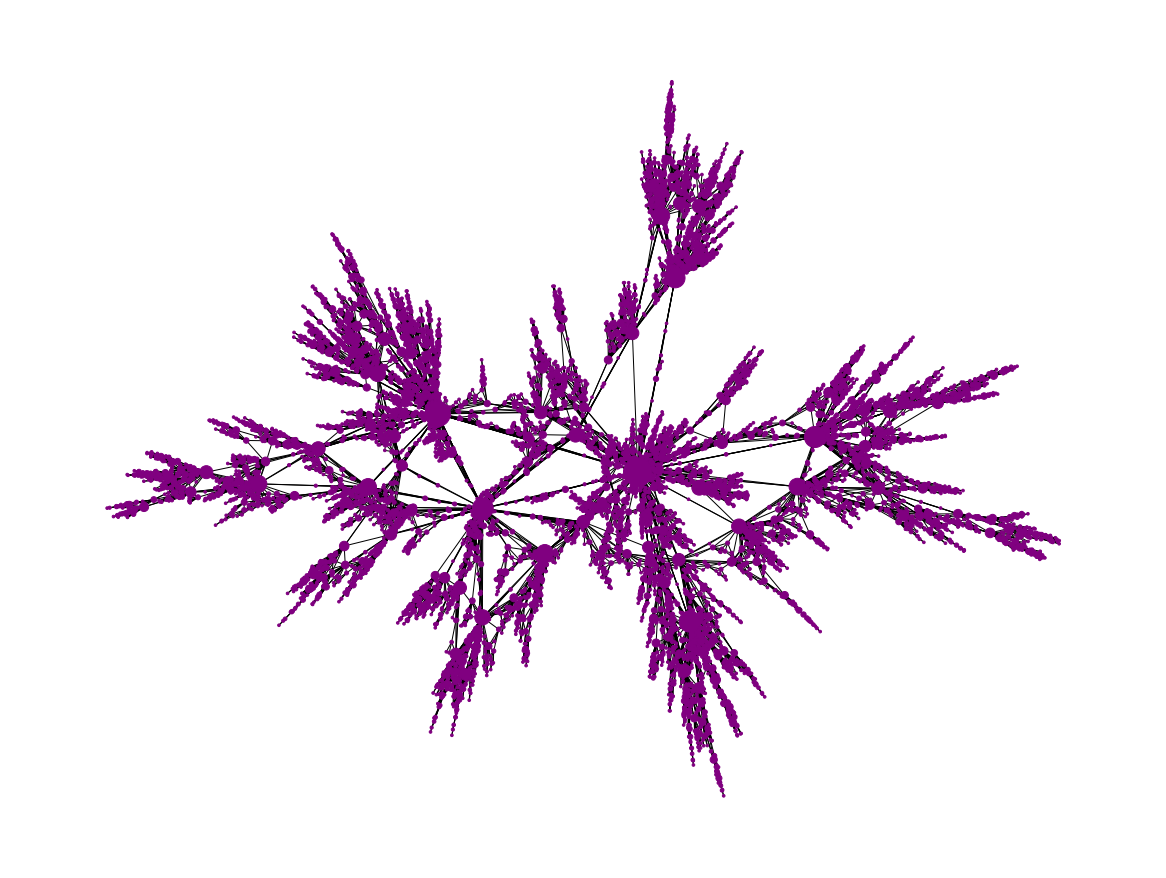

In [7]:
Substitute.print_Graph("sfdp")

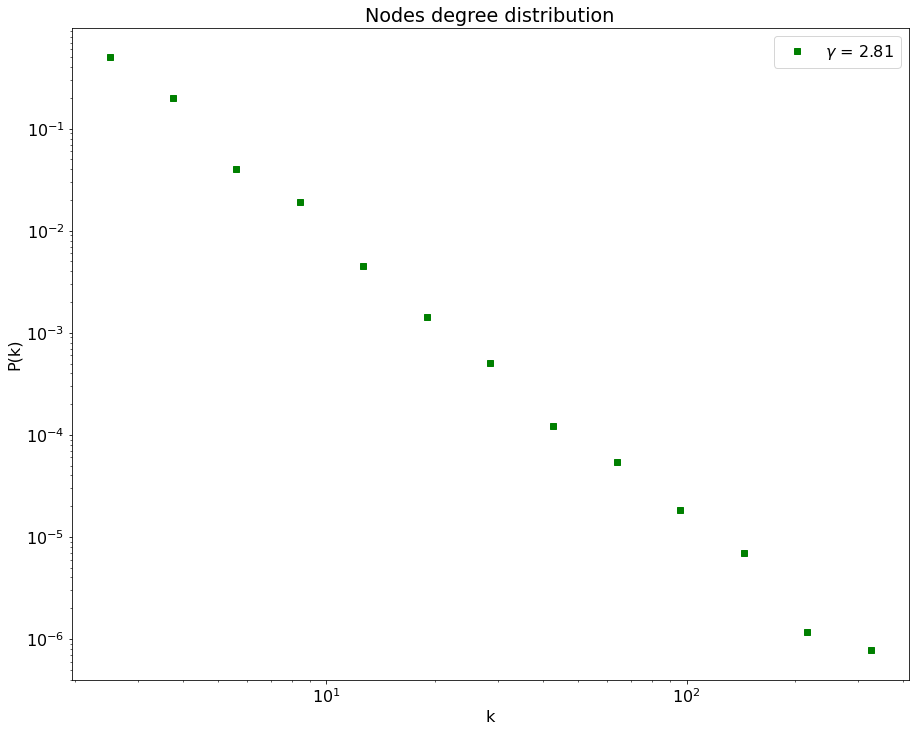

In [8]:
Substitute.Graph_dist(Substitute.G_Vert_dist(),"k","Nodes degree distribution")

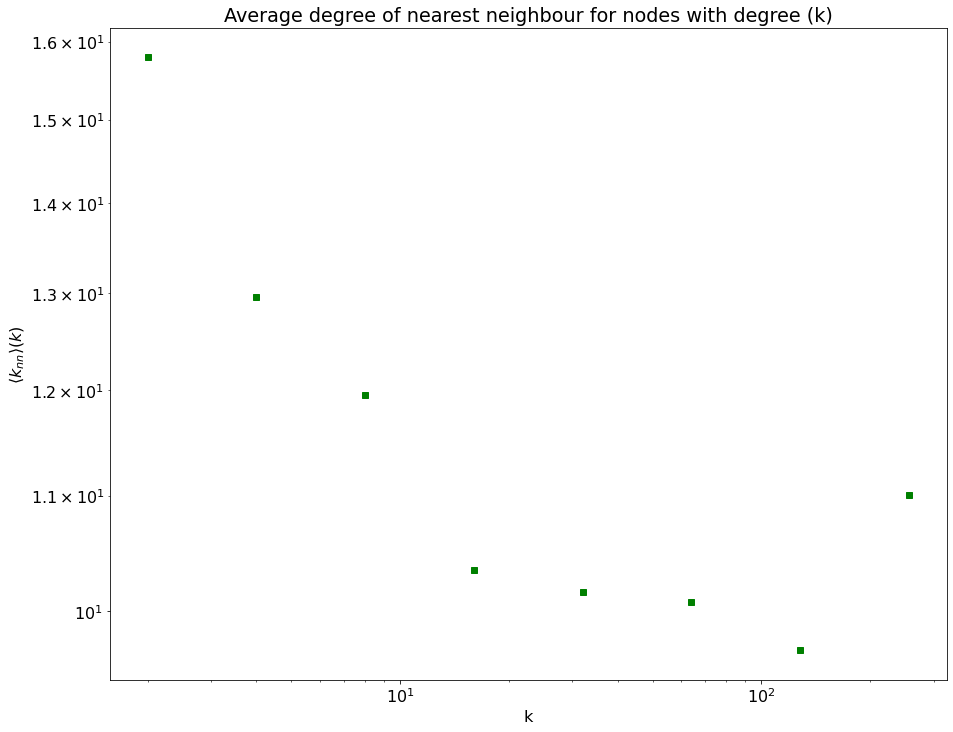

In [9]:
Substitute.showknn(list(Substitute.G_NN_Vert_dist().keys()),list(Substitute.G_NN_Vert_dist().values()))